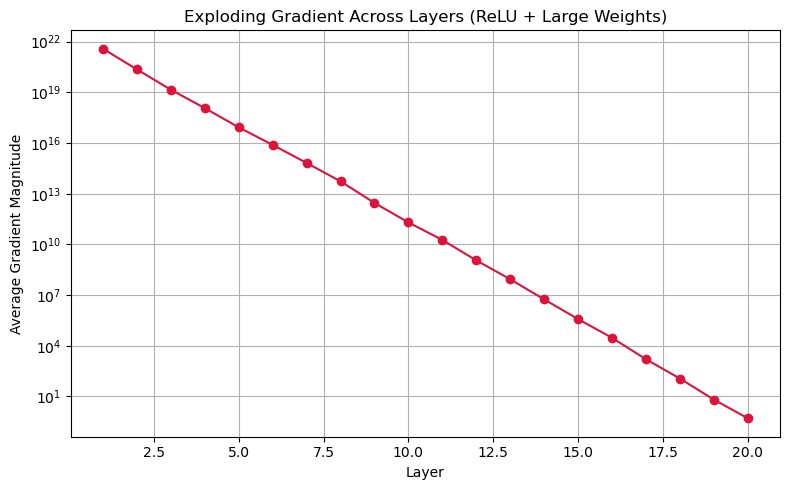

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Use ReLU for better demonstration of exploding gradients
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

# Settings
np.random.seed(42)
input_data = np.random.randn(1, 100)
num_layers = 20
layer_sizes = [100] * num_layers

# Large initial weights to provoke exploding gradient
weights = [np.random.randn(layer_sizes[i], layer_sizes[i]) * 2.0 for i in range(num_layers)]

# Forward pass
activations = [input_data]
zs = []

for w in weights:
    z = activations[-1] @ w
    zs.append(z)
    activations.append(relu(z))

# Backward pass with dummy gradient
grad = np.ones_like(activations[-1])
gradient_magnitudes = []

for i in reversed(range(num_layers)):
    dz = relu_derivative(zs[i])
    grad = grad * dz
    gradient_magnitudes.append(np.mean(np.abs(grad)))
    grad = grad @ weights[i].T

gradient_magnitudes.reverse()

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_layers + 1), gradient_magnitudes, marker='o', linestyle='-', color='crimson')
plt.xlabel("Layer")
plt.ylabel("Average Gradient Magnitude")
plt.title("Exploding Gradient Across Layers (ReLU + Large Weights)")
plt.yscale("log")
plt.grid(True)
plt.tight_layout()
plt.show()

